# Assignment 2

Yogendra Singh 214161014 <br>
M Shanmukh Rao 214161004

<b>Q1. Generate a set of points around a line $y = ax + b$<br><br>
    <b>1.(a) Choose $a = 2$ and $b = 3$

In [1]:
a=2
b=3

<b>1.(b) Select the range for $x$ as $[−10, 10]$ and generate $n = 100$ values for $x$
in that interval.

In [2]:
import numpy as np
n=100
# use np.arange if jump is mentioned 
# x = np.arange(-10,10,0.1)
# print(x)
x = np.linspace(-10, 10,n)

<b>1.(c) Compute the values of $y$ for each $x$ as $y_{i} = 2x_{i} + 3$.

In [3]:
y=a*x+b

<b>1.(d) Plot the line $y = 2x + 3$ in black color.

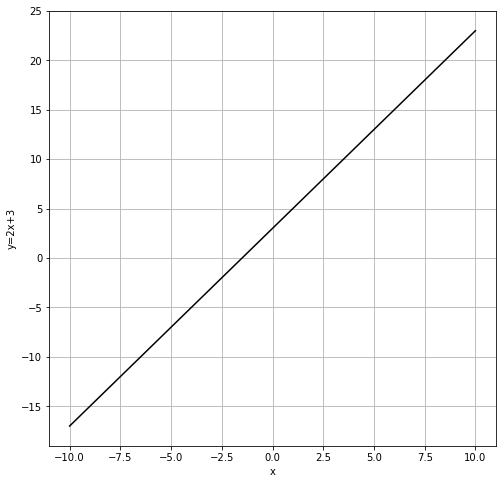

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8,8))
plt.xlim = ([-25,25])
plt.xlabel('x')
plt.ylabel('y=2x+3')
plt.grid()
plt.plot(x,y,color = 'black')

In [5]:
plt.xlim

[-25, 25]

<b>1.(e) Generate a set of n points around the line using the equation<br><br>
$$y_{i} = 2x_{i} + 3+ \sigma N(0, 1)$$

where $\sigma$ is the standard deviation and $N(0, 1)$ is the zero-mean unity-
variance normal distribution

In [6]:
sigma=1
N=np.random.normal(0, sigma, 100)
y1=(a*x)+b+(sigma*N)

<b>1.(f) Show the scatter plot of these noisy points (in red color) on the same
graph generated in step (d).

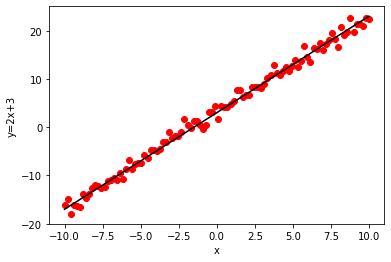

In [7]:
plt.xlabel('x')
plt.ylabel('y=2x+3')
plt.scatter(x, y1, color='r')
plt.plot(x,y,color = 'black')
plt.show()

<b>2. Plot the average error surface E for different values of $a$ and $b$ in the
interval of $[−10 : 0.1 : 10]$.<br><br>
    2.(a) Vary both $a$ and $b$ in steps of 0.1 in the interval $[−10, 10]$

In [8]:
import numpy as np
a1=np.arange(-10, 10.1, 0.1)
b1=np.arange(-10, 10.1, 0.1)

<b>2.(b) Compute the element-wise error as $e_{i} = y_{i} − \hat{y_{i}}$ where $\hat{y_{i}} = ax_{i} + b$
and $y_{i}$ is computed using equation 1

In [9]:
import random
comb = np.array(np.meshgrid(a1,b1)).T.reshape(-1,2)
i = random.randrange(0, np.shape(comb)[0])
a_est,b_est = comb[i]
y_est = a_est * x + b_est
e = y1 - y_est
print(i,a_est,b_est)
e

18587 -0.8000000000000327 -0.5000000000000338


array([-23.65222123, -22.22081239, -25.14257274, -23.19825931,
       -23.0952835 , -23.17209307, -20.46694288, -21.10796953,
       -19.96027185, -18.73510317, -17.92760378, -17.80636635,
       -18.19320942, -17.71968484, -16.31950211, -15.95703485,
       -15.41337502, -15.59232655, -13.97370679, -15.22403739,
       -12.88558377, -10.97253214, -12.54909493, -11.35744126,
       -10.97094048, -10.97517202,  -9.03331924,  -9.53835776,
        -7.61078294,  -7.46713759,  -7.587049  ,  -6.97616466,
        -5.41841517,  -5.31779285,  -2.90015395,  -4.11335478,
        -3.41819775,  -3.37750219,  -2.32947915,   0.60455484,
        -0.49898176,  -0.94869373,   0.62657332,   0.68575944,
         0.04681744,  -0.64853377,   0.48126779,   3.18447336,
         3.45619347,   4.73494676,   2.38831484,   5.10480287,
         5.09672971,   5.2148293 ,   6.0499899 ,   6.73701752,
         9.34390696,   9.32761597,   8.04872855,   8.66954054,
         8.92247958,  10.75741196,  10.91917994,  11.08

<b>2.(c) Compute the average error as<br><br>
    $$E = \frac{1}{n}\sum \limits _{i=1} ^{n} e_{i}^{2}$$

In [10]:
E = (1/n) * np.dot(e.T,e)
E

279.20686165102785

<b>2.(d) Compute the average error values for all combinations of $a$ and $b$.

In [11]:
E = np.zeros(np.shape(comb)[0])
for i in range(np.shape(comb)[0]):
    a,b = comb[i]
    yhat = a * x + b
    e = y1 - yhat
    E[i] = (1/n) * np.dot(e.T,e)
E 

array([5063.4050663 , 5060.7800796 , 5058.1750929 , ..., 2226.72774919,
       2228.06276249, 2229.41777579])

<b>2.(e) Plot the error surface with the values of $a$ along $x$-axis, that of $b$
along $y$-axis and $E$ along $z$-axis.

optimised value of (a,b) by this method is (1.9999999999999574,3.199999999999953)


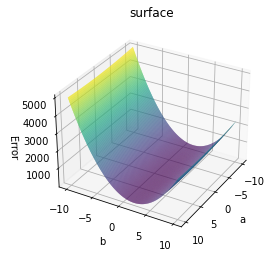

In [12]:
import matplotlib.pyplot as plt
Z = np.zeros((201,201))
Zmin = 1500
A, B = np.meshgrid(a1, b1)
for i in range(np.shape(a1)[0]):
    for j in range(np.shape(b1)[0]):
        yhat = a1[i] * x + b1[j]
        z = y1 - yhat
        Z[i, j] =(1/n) * np.dot(z.T,z)
        if(Z[i,j] < Zmin):
            Zmin = Z[i, j]
            a_min, b_min = a1[i], b1[j]
            
print(f"optimised value of (a,b) by this method is ({a_min},{b_min})") 

ax = plt.axes(projection='3d')
ax.plot_surface(A, B, Z, rstride=1, cstride=1,
                cmap='viridis')
ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('Error')
ax.set_title('surface')
ax.view_init(30, 30)

In [13]:
np.shape(A)

(201, 201)

In [14]:
np.shape(B)

(201, 201)

In [15]:
np.shape(Z)

(201, 201)

<br><br><b>3. Solve for a and b using Pseudo-inverse based approach on the points generated in question 1.

In [16]:
import numpy as np
n=100
x = np.linspace(-10, 10,n)
A=np.zeros((len(x),2))
b=np.zeros((len(y1),1))
X=np.zeros((2,1))
A[:,0]=x
A[:,1]=1
b[:,0]=y1
X=np.dot(np.dot(np.linalg.inv(np.dot(A.T,A)),A.T),b)
print(f"optimised value of (a,b) by this method is ({X[0,0]},{X[1,0]})")

optimised value of (a,b) by this method is (1.9900396415990995,3.1749335079992846)


<br><br><b>4. Solve for a and b using the Gradient Descent approach where the values
of $p = (a, b)^{T}$ in the $(k + 1)^{th}$ iteration is updated as<br><br>
    $$p_{k+1} = p_{k} - \eta\triangledown_{p}E|_{p=p_{k}}$$<br>
    
Vary the update rate $\eta$ and the initial values $(a_{0}, b_{0})$  and note the final solution after 100 iterations. Plot the trajectory of the solutions $(a_{k}, b_{k})$ for varying $(a_{0}, b_{0}, \eta)$ on the contour plot of E on $(a, b)$ plane.

<b>Initialised $a_{0} = 3$, $b_{0} = 12$, $\eta = 0.01$

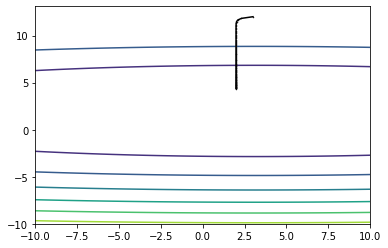

(1.9999999999999574, 3.199999999999953)

In [17]:
ahat = 3 * np.ones(101)
bhat = 12 * np.ones(101)
Ehat = np.ones(100)
eta = 0.01
O = np.ones(100)


for k in range(100):
    e = y1 - (ahat[k]*x + bhat[k])
    Ehat[k] = (1/n) * np.dot(e.T, e)
    da = (1/n) * (-np.dot(y1.T,x) - np.dot(x.T,y1) + 2*ahat[k]*np.dot(x.T,x) + bhat[k]*np.dot(x.T,O) + bhat[k]*np.dot(O.T,x))
    db = (1/n) * (-np.dot(y1.T,O) + ahat[k]*np.dot(x.T,O) - np.dot(O.T,y1) + ahat[k]*np.dot(O.T,x) + 2*bhat[k]*np.dot(O.T,O))
    ahat[k+1] = ahat[k] - eta * da
    bhat[k+1] = bhat[k] - eta * db
    
ahat = ahat[:-1]
bhat = bhat[:-1]

a1=np.arange(-10, 10.1, 0.1)
b1=np.arange(-10, 10.1, 0.1)
Z = np.zeros((np.shape(a1)[0],np.shape(b1)[0]))
Zmin = 150000
A, B = np.meshgrid(a1, b1)
for i in range(np.shape(a1)[0]):
    for j in range(np.shape(b1)[0]):
        yhat = a1[i] * x + b1[j]
        z = y1 - yhat
        Z[i, j] =(1/n) * np.dot(z.T,z)
        if(Z[i,j] < Zmin):
            Zmin = Z[i, j]
            a_min, b_min = a1[i], b1[j]
fig, ax3 = plt.subplots(1, 1)
ax3.contour(A, B, Z)
plt.plot(ahat, bhat, marker=".", markersize=1, color = 'black')



plt.show()
a_min, b_min

<br><br><br><b>Initialised $a_{0} = 2.2$, $b_{0} = 3.5$, $\eta = 0.1$

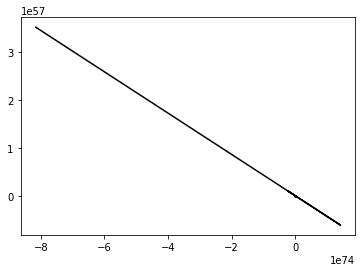

(1.9999999999999574, 3.199999999999953)

In [18]:
ahat = 2.2 * np.ones(101)
bhat = 3.5 * np.ones(101)
Ehat = np.ones(100)
eta = 0.1
O = np.ones(100)


for k in range(100):
    e = y1 - (ahat[k]*x + bhat[k])
    Ehat[k] = (1/n) * np.dot(e.T, e)
    da = (1/n) * (-np.dot(y1.T,x) - np.dot(x.T,y1) + 2*ahat[k]*np.dot(x.T,x) + bhat[k]*np.dot(x.T,O) + bhat[k]*np.dot(O.T,x))
    db = (1/n) * (-np.dot(y1.T,O) + ahat[k]*np.dot(x.T,O) - np.dot(O.T,y1) + ahat[k]*np.dot(O.T,x) + 2*bhat[k]*np.dot(O.T,O))
    ahat[k+1] = ahat[k] - eta * da
    bhat[k+1] = bhat[k] - eta * db
    
ahat = ahat[:-1]
bhat = bhat[:-1]

a1=np.arange(-10, 10.1, 0.1)
b1=np.arange(-10, 10.1, 0.1)
Z = np.zeros((np.shape(a1)[0],np.shape(b1)[0]))
Zmin = 150000
A, B = np.meshgrid(a1, b1)
for i in range(np.shape(a1)[0]):
    for j in range(np.shape(b1)[0]):
        yhat = a1[i] * x + b1[j]
        z = y1 - yhat
        Z[i, j] =(1/n) * np.dot(z.T,z)
        if(Z[i,j] < Zmin):
            Zmin = Z[i, j]
            a_min, b_min = a1[i], b1[j]
fig, ax3 = plt.subplots(1, 1)
ax3.contour(A, B, Z)
plt.plot(ahat, bhat, marker=".", markersize=1, color = 'black')



plt.show()
a_min, b_min

<b>Note : even though our initial guess are so close to optimal values values of a oscialltes
because of a high update rate.<br><br><br>

<b>Initialised $a_{0} = 2.2$, $b_{0} = 3.5$, $\eta = 0.01$

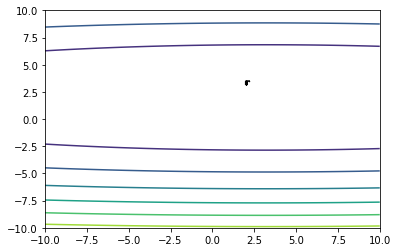

(1.9999999999999574, 3.199999999999953)

In [19]:
ahat = 2.2 * np.ones(101)
bhat = 3.5 * np.ones(101)
Ehat = np.ones(100)
eta = 0.01
O = np.ones(100)


for k in range(100):
    e = y1 - (ahat[k]*x + bhat[k])
    Ehat[k] = (1/n) * np.dot(e.T, e)
    da = (1/n) * (-np.dot(y1.T,x) - np.dot(x.T,y1) + 2*ahat[k]*np.dot(x.T,x) + bhat[k]*np.dot(x.T,O) + bhat[k]*np.dot(O.T,x))
    db = (1/n) * (-np.dot(y1.T,O) + ahat[k]*np.dot(x.T,O) - np.dot(O.T,y1) + ahat[k]*np.dot(O.T,x) + 2*bhat[k]*np.dot(O.T,O))
    ahat[k+1] = ahat[k] - eta * da
    bhat[k+1] = bhat[k] - eta * db
    
ahat = ahat[:-1]
bhat = bhat[:-1]

a1=np.arange(-10, 10.1, 0.1)
b1=np.arange(-10, 10.1, 0.1)
Z = np.zeros((np.shape(a1)[0],np.shape(b1)[0]))
Zmin = 150000
A, B = np.meshgrid(a1, b1)
for i in range(np.shape(a1)[0]):
    for j in range(np.shape(b1)[0]):
        yhat = a1[i] * x + b1[j]
        z = y1 - yhat
        Z[i, j] =(1/n) * np.dot(z.T,z)
        if(Z[i,j] < Zmin):
            Zmin = Z[i, j]
            a_min, b_min = a1[i], b1[j]
fig, ax3 = plt.subplots(1, 1)
ax3.contour(A, B, Z)

plt.plot(ahat, bhat, marker=".", markersize=1, color = 'black')
plt.show()
a_min, b_min

<b>Here we can see it gets to the optimum solution<br><br><br>

<b>Initialised $a_{0} = 22$, $b_{0} = 35$, $\eta = 0.001$

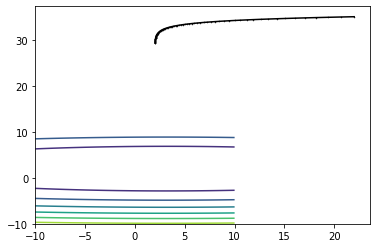

(1.9999999999999574, 3.199999999999953)

In [20]:
ahat = 22 * np.ones(101)
bhat = 35 * np.ones(101)
Ehat = np.ones(100)
eta = 0.001
O = np.ones(100)


for k in range(100):
    e = y1 - (ahat[k]*x + bhat[k])
    Ehat[k] = (1/n) * np.dot(e.T, e)
    da = (1/n) * (-np.dot(y1.T,x) - np.dot(x.T,y1) + 2*ahat[k]*np.dot(x.T,x) + bhat[k]*np.dot(x.T,O) + bhat[k]*np.dot(O.T,x))
    db = (1/n) * (-np.dot(y1.T,O) + ahat[k]*np.dot(x.T,O) - np.dot(O.T,y1) + ahat[k]*np.dot(O.T,x) + 2*bhat[k]*np.dot(O.T,O))
    ahat[k+1] = ahat[k] - eta * da
    bhat[k+1] = bhat[k] - eta * db
    
ahat = ahat[:-1]
bhat = bhat[:-1]

a1=np.arange(-10, 10.1, 0.1)
b1=np.arange(-10, 10.1, 0.1)
Z = np.zeros((np.shape(a1)[0],np.shape(b1)[0]))
Zmin = 150000
A, B = np.meshgrid(a1, b1)
for i in range(np.shape(a1)[0]):
    for j in range(np.shape(b1)[0]):
        yhat = a1[i] * x + b1[j]
        z = y1 - yhat
        Z[i, j] =(1/n) * np.dot(z.T,z)
        if(Z[i,j] < Zmin):
            Zmin = Z[i, j]
            a_min, b_min = a1[i], b1[j]
fig, ax3 = plt.subplots(1, 1)
ax3.contour(A, B, Z)
plt.plot(ahat, bhat, marker=".", markersize=1, color = 'black')



plt.show()
a_min, b_min

<b>Note : Here since the learning rate is too low and no. of iterations are not enough
optimum solution is not reached.
Though its going towards it$(2,3)$.

<b>5. Consider the multi-modal function given by<br><br>
$z = 1.7∗exp[-\{\frac{(x − 3)^{2}}{10} + \frac{(y-3)^{2}}{10}\}]+exp[-\{\frac{(x + 5)^{2}}{8} + \frac{(y+5)^{2}}{8}\}]+2*exp[-\{\frac{x^{2}}{4}+\frac{y^{2}}{5}\}]+1.5*exp[-\{\frac{(x-4)^{2}}{18} + \frac{(y+4)^{2}}{16}\}] + 1.2*exp[-\{\frac{(x+4)^{2}}{18} + \frac{(y-4)^{2}}{16}\}]$<br><br>

Display the surface plot and contour plot of the above function in the
search space given by $Smin = [xmin, ymin]^{T} = [−10,−10]^{T}$ and $Smax =
[xmax, ymax]^{T} = [10, 10]^{T}$ .

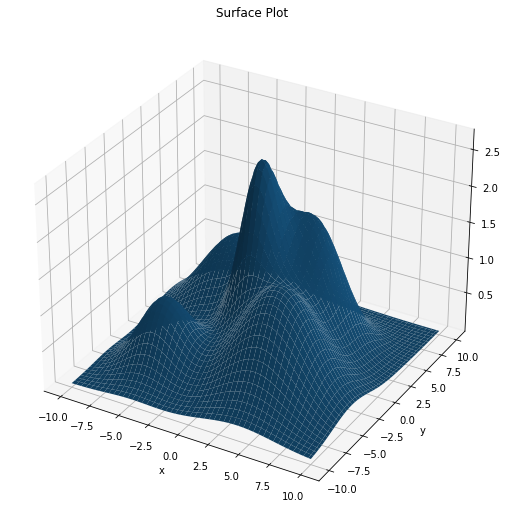

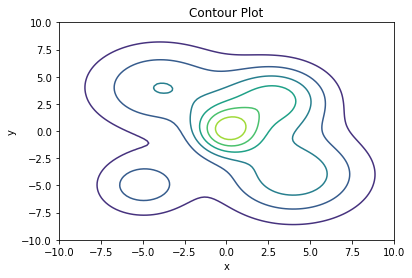

In [27]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(-10,10,100)
y = np.linspace(-10,10,100)
X, Y = np.meshgrid(x, y, indexing='ij')
z = (1.7*np.exp(-((np.square(X-3)/10)+(np.square(Y-3)/10))))+(np.exp(-((np.square(X+5)/8)+(np.square(Y+5)/8))))+(2*np.exp(-((np.square(X)/4)+(np.square(Y)/5))))+(1.5*np.exp(-((np.square(X-4)/18)+(np.square(Y+4)/16))))+(1.2*np.exp(-((np.square(X+4)/18)+(np.square(Y-4)/16))))
fig = plt.figure(figsize =(14, 9))
ax1 = plt.axes(projection ='3d')
ax1.plot_surface(X, Y, z)
ax1.set_title('Surface Plot')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
fig, ax2 = plt.subplots(1, 1)
ax2 = plt.axes(projection='rectilinear')
ax2.contour(X, Y, z)
ax2.set_title('Contour Plot')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
plt.show()